# Persistent Random Walk in One Dimension
In persistent random walk, the jump probability depends on the direction of the previous step. Suppose that step $N-1$ has been made, then step $N$ is made in the same direction with probability $p$; a step in the opposite direction occurs with probability $q = 1-p$. When $p = 1/2$, the persistent random walk reduces to the usual random walk.

We would like to obtain the following observables:

- The mean-squared displacement of the walker after $N$ steps.
- The mean number of distinct sites visited during the course of $N$ step walk
- The probability that the displacement of the walker from the origin is $x$ after $N$ steps.

In [1]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# set font scale and style
plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run -i '../src/persistent_random_walk_1d.py'

## 1. Trajectories

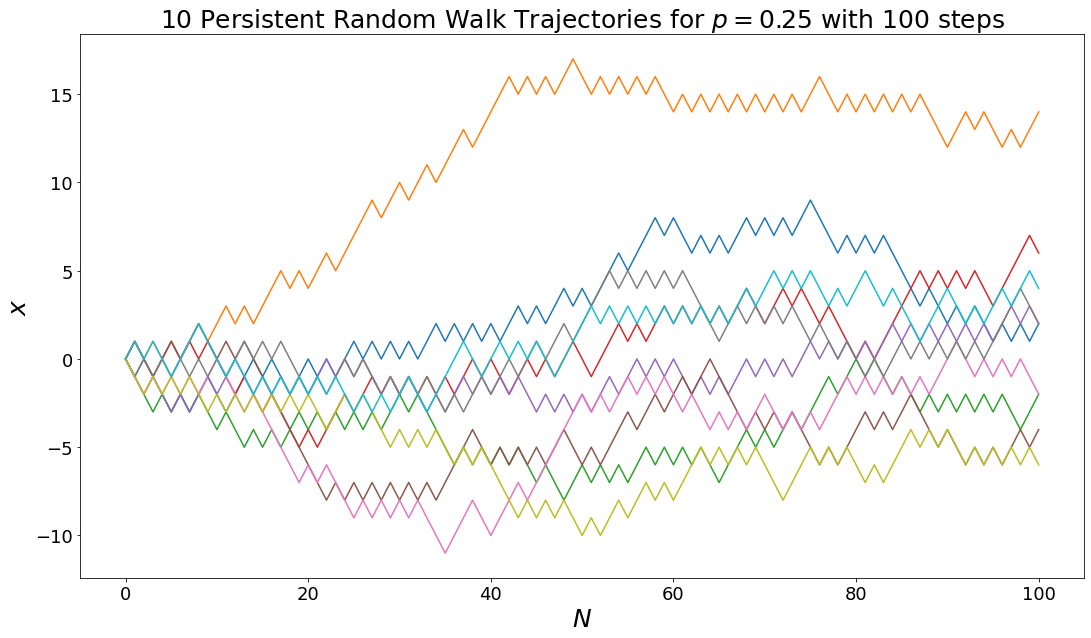

In [6]:
plt.subplots(figsize=(18, 10))
walk_1d = PersistentRandomWalk1D(nsteps = 10**2, ntrials = 10**4, p = 0.25)
x_arr, _, _, _ = walk_1d.monte_carlo()

for i in range(10):
    plt.plot(range(len(x_arr[i,:])), x_arr[i,:])

plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel(r'$x$', fontsize = 25)
plt.title(r'10 Persistent Random Walk Trajectories for $p=0.25$ with 100 steps', fontsize = 25)
plt.savefig('../img/pfig.png')
plt.savefig('../img/pfig.pdf')
plt.show()

## 2A. Mean-Squared Displacement 

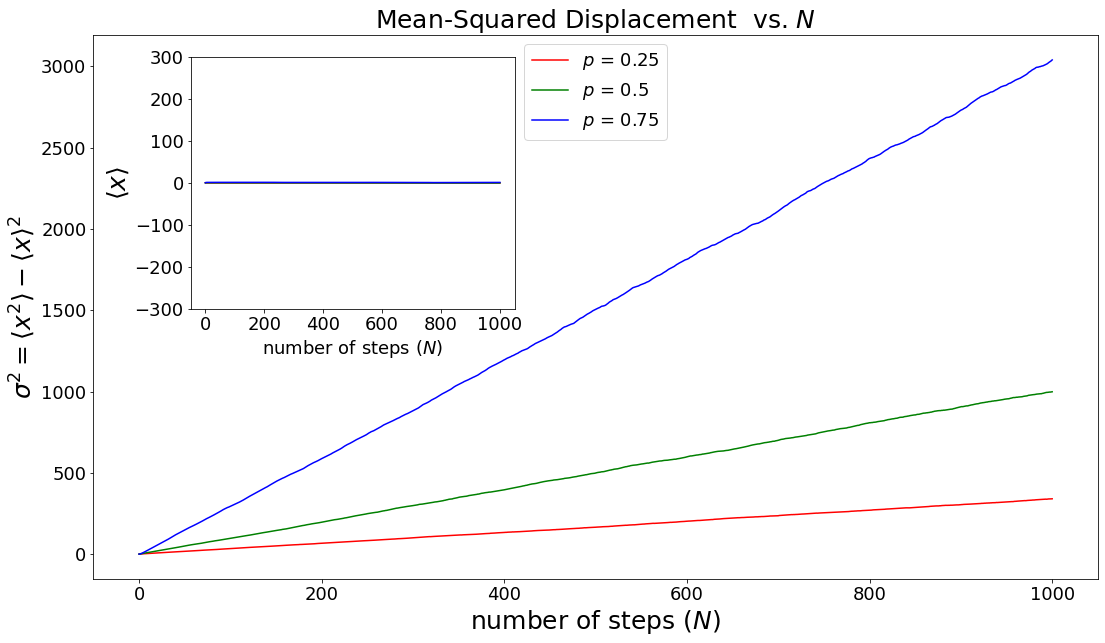

In [8]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.5,0.25,0.35]
ax2 = fig.add_axes([left, bottom, width, height])
color = ['r', 'g', 'b']
prob = [0.25, 0.5, 0.75]

for i, pval in enumerate(prob):
    walk_1d = PersistentRandomWalk1D(nsteps = 10**3, ntrials = 10**4, p = pval)
    _, _, xbar, var_ = walk_1d.monte_carlo()
    ax1.plot(range(len(var_)), var_,label = r"$p$ = {0:.2g}".format(pval), color = color[i])
    ax2.plot(range(len(xbar)), xbar, color = color[i])

ax1.set_xlabel(r'number of steps ($N$)', fontsize = 25)
ax1.set_ylabel(r'$\sigma^2 = \langle x^2\rangle-\langle x\rangle^2$', fontsize = 25)
ax1.set_title(r'Mean-Squared Displacement  vs. $N$', fontsize = 25)
ax1.legend(loc = 'upper center')
ax2.set_xlabel(r'number of steps ($N$)')
ax2.set_ylabel(r'$\langle x\rangle$', fontsize = 25)
ax2.set_ylim([-300,300])
plt.savefig('../img/pfig1a.png')
plt.savefig('../img/pfig1a.pdf')
plt.show()

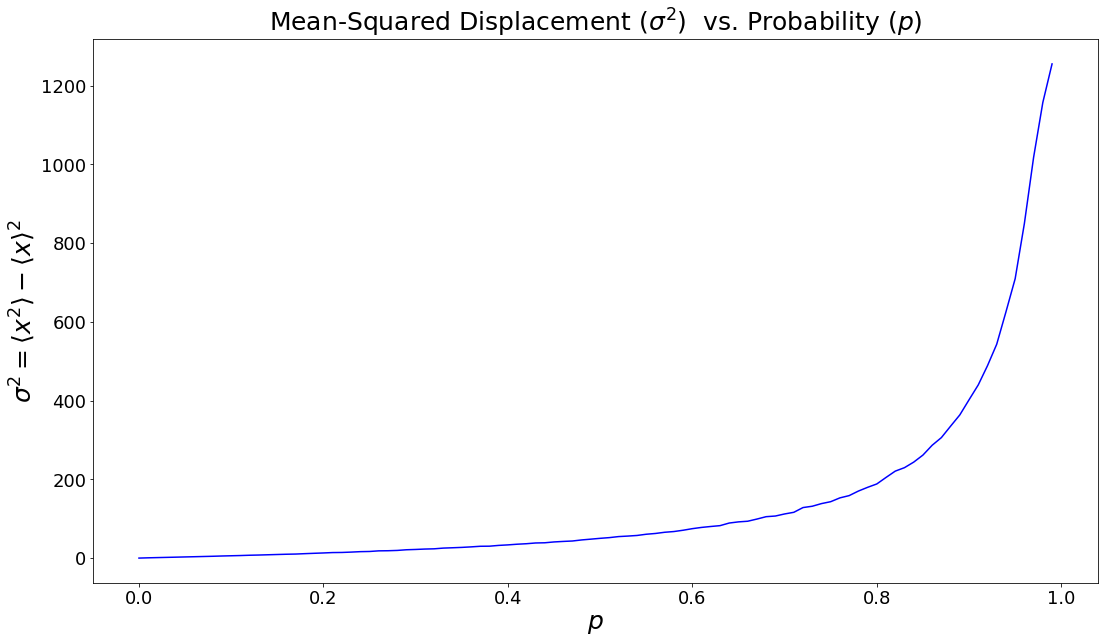

In [21]:
plt.subplots(figsize=(18, 10)) # figure layout
pr = np.linspace(0,.99,100) # probability values
res = np.zeros(len(pr)) # result array

for i, pval in enumerate(pr):
    walk_1d = PersistentRandomWalk1D(nsteps = 10**2, ntrials = 10**4, p = pval)
    _, _, xbar, var_ = walk_1d.monte_carlo()
    res[i] = np.mean(var_)
    
plt.plot(pr, res, color = 'b')
plt.xlabel(r'$p$', fontsize = 25)
plt.ylabel(r'$\sigma^2 = \langle x^2\rangle-\langle x\rangle^2$', fontsize = 25)
plt.title(r'Mean-Squared Displacement ($\sigma^2$)  vs. Probability ($p$)', fontsize = 25)
plt.savefig('../img/pfig1a_.png')
plt.savefig('../img/pfig1a_.pdf')
plt.show()

## 2B. Power-Law Scaling

In [4]:
# extract few values for log-log plot
walk_1d = PersistentRandomWalk1D(nsteps = 10**3, ntrials = 10**4, p = 0.75)
_, _, _, sigma2 = walk_1d.monte_carlo()

N = [8, 64, 256, 512]
sigma2_val = np.zeros(len(N))
for i, val in enumerate(N):
    sigma2_val[i] = sigma2[val]

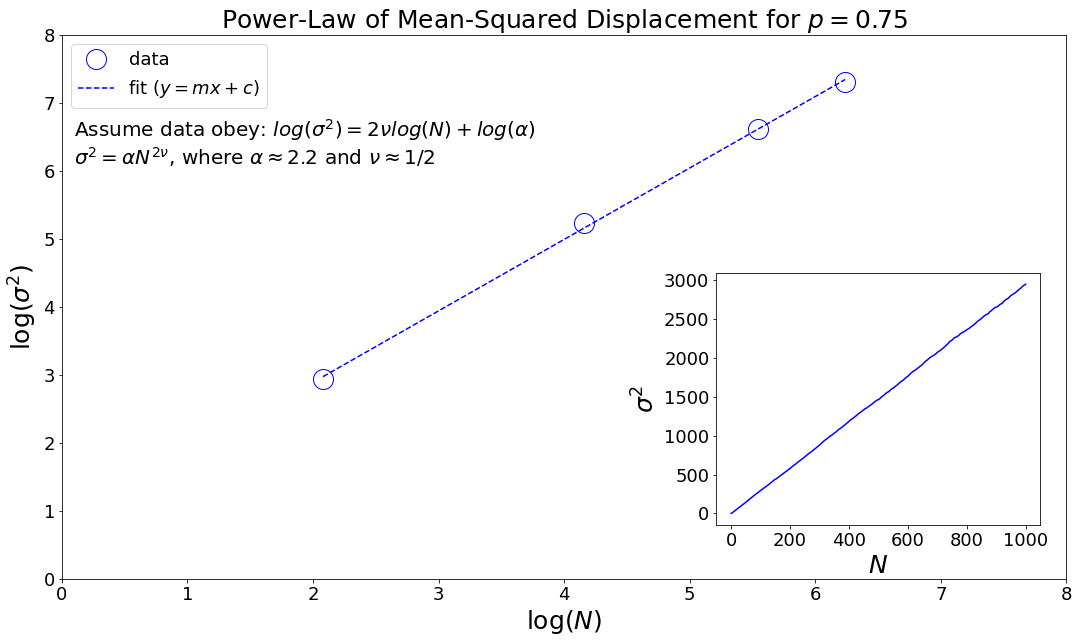

alpha = 2.2 and nu = 0.53
Diffusion coeffient D = alpha/2 = 1.1


In [5]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(N), np.log(sigma2_val), color = 'b', marker = 'o', markerfacecolor = 'none',
         linestyle = " ", markersize = 20, label = 'data')
ax2.plot(range(len(sigma2)), sigma2, color = 'b')

# fit data
m, c = np.polyfit(np.log(N), np.log(sigma2_val), 1) # extract slope and intercept
ax1.plot(np.log(N), m*np.log(N) + c,  color = 'b', linestyle = "--", label=r'fit ($y = mx + c$)')

ax1.set_xlim([0,8])
ax1.set_ylim([0,8])
ax1.set_ylabel(r'log($\sigma^2$)', fontsize = 25)
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Power-Law of Mean-Squared Displacement for $p=0.75$', fontsize = 25)
ax1.text(0.1,6.5, r'Assume data obey: $log(\sigma^2) = 2\nu log(N) + log(\alpha)$', fontsize = 20)
ax1.text(0.1,6.1,
         r'$\sigma^2 = \alpha N^{2\nu}$, where $\alpha \approx 2.2$ and $\nu \approx 1/2$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_ylabel(r'$\sigma^2$', fontsize = 25)
ax2.set_xlabel(r'$N$', fontsize = 25)
plt.savefig('../img/pfig1b.png')
plt.savefig('../img/pfig1b.pdf')
plt.show()

#------------------------------------------------------------------#
alpha = np.exp(c)
nu = m/2
print("alpha = {0:.2g} and nu = {1:.2g}".format(alpha, nu))
print("Diffusion coeffient D = alpha/2 = {0:.2g}".format(alpha/2))

## 3. Mean Number of Distinct Sites Visited

In [6]:
# extract few values for log-log plot
walk_1d = PersistentRandomWalk1D(nsteps = 10**3, ntrials = 10**4, p = 0.75)
res = walk_1d.average_sites_visited()

n = [8, 64, 256, 512]
s = np.zeros(len(n))
for i, val in enumerate(n):
    s[i] = res[val]

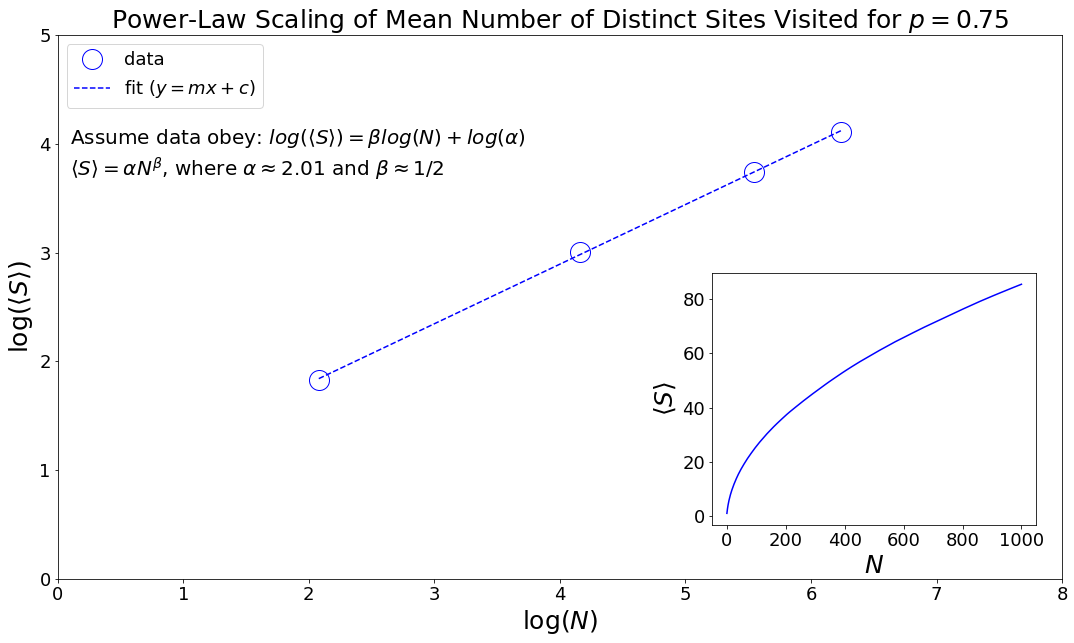

In [7]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(n), np.log(s), color = 'b', marker = 'o',linestyle = " ", 
         markersize = 20, markerfacecolor = 'none', label = 'data')
ax2.plot(range(len(res)), res, color = 'b')

# fit data
m, c = np.polyfit(np.log(n), np.log(s), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c,  color = 'b', linestyle = "--", 
         label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,8])
ax1.set_ylim([0,5])
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_ylabel(r'log($\langle S\rangle$)', fontsize = 25)
ax1.set_title(r'Power-Law Scaling of Mean Number of Distinct Sites Visited for $p= 0.75$',
              fontsize = 25)
ax1.text(0.1,4, r'Assume data obey: $log(\langle S\rangle) = \beta log(N) + log(\alpha)$', 
         fontsize = 20)
ax1.text(0.1, 3.7, 
         r'$\langle S\rangle \alpha N^{\beta}$, where $\alpha \approx 2.01$ and $\beta \approx 1/2$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_xlabel(r'$N$', fontsize = 25)
ax2.set_ylabel(r'$\langle S\rangle$', fontsize = 25)
plt.savefig('../img/pfig2.png')
plt.savefig('../img/pfig2.pdf')
plt.show()

## 4. Probability Distribution

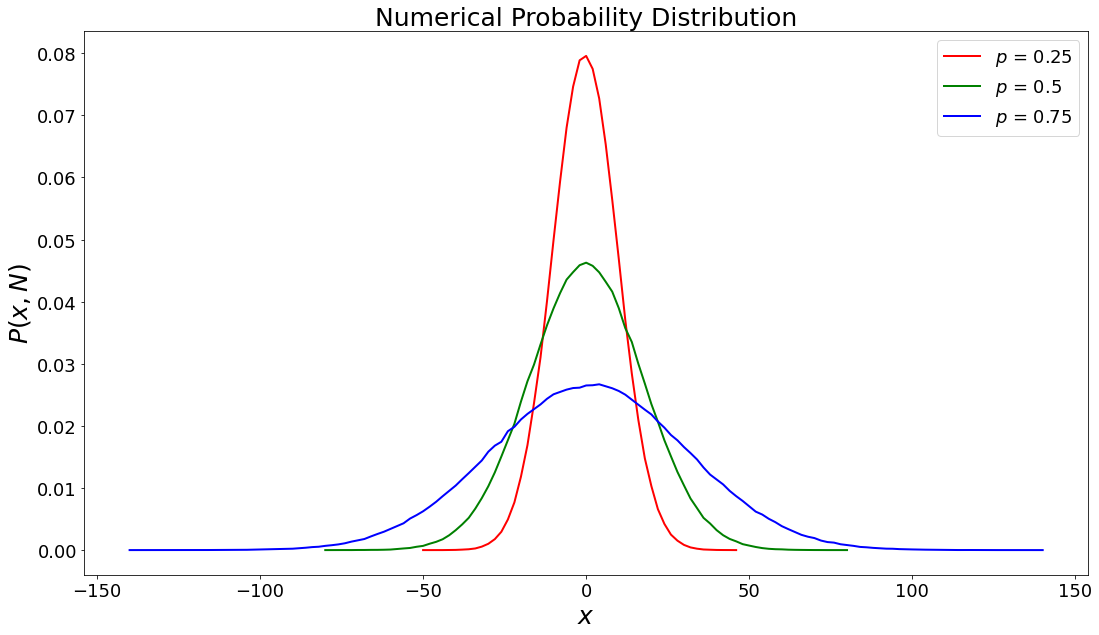

In [3]:
fig, ax = plt.subplots(figsize=(18, 10))

# initialization
nsteps = 300
ntrials = 10**6
color = ['r', 'g', 'b']
prob = [0.25, 0.5, 0.75]

for i, pval in enumerate(prob):
    walk_1d = PersistentRandomWalk1D(nsteps = nsteps, ntrials = ntrials, p = pval)
    _, hashmap, _, _ = walk_1d.monte_carlo()
    x_dist = pd.DataFrame({'x':hashmap.keys(), 'val':[x/ntrials for x in hashmap.values()]})
    x_dist = x_dist.groupby(['x']).mean()
    pd.Series(x_dist.val, index = x_dist.index).plot(ax = ax,linewidth = 2, color = color[i],
                                  label = r"$p$ = {0:.2g}".format(pval))
plt.xlabel(r'$x$', fontsize = 25)
plt.ylabel(r'$P(x,N)$', fontsize = 25)
plt.title(r'Numerical Probability Distribution', fontsize = 25)
plt.legend(loc = 'best')
plt.savefig('../img/pfig3.png')
plt.savefig('../img/pfig3.pdf')
plt.show()